# Ordinal regression models

* statsmodel OrderedModel

In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from training.creating_dataset import load_and_preprocess_data
from training.constants import FEATURES, DATASET_FILES, ORDERED_CHARACTERISTICS_FULL


bestiaries = load_and_preprocess_data(
    [f"../../pathfinder_2e_remaster_data/{f}" for f in DATASET_FILES], FEATURES
)

columns = [col for col in bestiaries.columns if col not in ["book", "level"]]
scaler = MinMaxScaler()
min_max_df = pd.DataFrame()
min_max_df[columns] = pd.DataFrame(
    scaler.fit_transform(bestiaries[columns]), index=bestiaries.index
)
min_max_df["book"] = bestiaries["book"]
min_max_df["level"] = bestiaries["level"]
bestiaries = min_max_df
bestiaries = bestiaries[ORDERED_CHARACTERISTICS_FULL + ["book", "level"]]
bestiaries.head()

,str,dex,con,int,wis,cha,ac,hp,perception,fortitude,...,area-damage_weakness,cold_weakness,cold-iron_weakness,evil_weakness,fire_weakness,good_weakness,slashing_weakness,splash-damage_weakness,book,level
0,0.588235,0.588235,0.357143,0.200000,0.470588,0.529412,0.509434,0.252087,0.156522,0.425532,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #164: Hands of the Devil,8
1,0.588235,0.411765,0.428571,0.600000,0.411765,0.411765,0.396226,0.123539,0.130435,0.297872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #163: Ruins of Gauntlight,5
2,0.529412,0.470588,0.214286,0.400000,0.470588,0.352941,0.320755,0.078464,0.069565,0.170213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #163: Ruins of Gauntlight,3
3,0.352941,0.529412,0.214286,0.333333,0.470588,0.352941,0.358491,0.048414,0.104348,0.170213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #164: Hands of the Devil,3
4,0.588235,0.588235,0.500000,0.466667,0.529412,0.588235,0.490566,0.198664,0.156522,0.361702,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #164: Hands of the Devil,8


In [2]:
import os
from training.splitting_dataset import split_dataframe, get_date_books_mapping

os.chdir("../../training")
books_dates_map = get_date_books_mapping()

books_to_include = [
    book for _, row in books_dates_map["books"].iteritems() for book in row
]
bestiaries = bestiaries[bestiaries["book"].isin(books_to_include)]
X_train, X_test, y_train, y_test = split_dataframe(bestiaries)
os.chdir("../notebooks/models")

In [3]:
X_test.head()

,str,dex,con,int,wis,cha,ac,hp,perception,fortitude,...,poison_resistance,slashing_resistance,area-damage_weakness,cold_weakness,cold-iron_weakness,evil_weakness,fire_weakness,good_weakness,slashing_weakness,splash-damage_weakness
651,0.588235,0.470588,0.428571,0.000000,0.411765,0.176471,0.452830,0.148581,0.104348,0.340426,...,0.0,0.25,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
652,0.000000,0.705882,0.357143,0.666667,0.588235,0.705882,0.547170,0.290484,0.191304,0.382979,...,0.0,0.00,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0
656,0.411765,0.588235,0.285714,0.400000,0.411765,0.588235,0.396226,0.081803,0.095652,0.191489,...,0.0,0.25,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
657,0.588235,0.647059,0.428571,0.533333,0.411765,0.529412,0.490566,0.207012,0.139130,0.340426,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
659,0.647059,0.470588,0.428571,0.466667,0.647059,0.588235,0.490566,0.273790,0.156522,0.297872,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0


## OrderedModel (statsmodels)
### probit

In [4]:
from statsmodels.miscmodels.ordinal_model import OrderedModel


model1 = OrderedModel(y_train, X_train, distr="probit")
model = model1.fit(method="bfgs")

C:\Users\jolka\OneDrive\Dokumenty\mgr\Predictive-ML-in-TTRPG-game-design\venv\lib\site-packages\scipy\optimize\_optimize.py:1292: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)


         Current function value: 0.601896
         Iterations: 56
         Function evaluations: 120
         Gradient evaluations: 111


C:\Users\jolka\OneDrive\Dokumenty\mgr\Predictive-ML-in-TTRPG-game-design\venv\lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\jolka\OneDrive\Dokumenty\mgr\Predictive-ML-in-TTRPG-game-design\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [5]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                  level   Log-Likelihood:                -817.98
Model:                   OrderedModel   AIC:                             1780.
Method:            Maximum Likelihood   BIC:                             2155.
Date:                Sun, 19 May 2024                                         
Time:                        20:44:48                                         
No. Observations:                1359                                         
Df Residuals:                    1287                                         
Df Model:                          50                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
str                       -0.5714        nan        nan        nan         nan         nan
dex                       -1.4846        nan        nan        nan         nan         nan
con                        0.3825        nan        nan        nan         nan         nan
int                        0.9605        nan        nan        nan         nan         nan
wis                       -1.0603        nan        nan        nan         nan         nan
cha                       -1.3147        nan        nan        nan         nan         nan
ac                        16.0111        nan        nan        nan         nan         nan
hp                        18.5940        nan        nan        nan         nan         nan
perception                 8.0349        nan        nan        nan         nan         nan
fortitude                 18.6534        nan        nan        nan         nan         nan
reflex                    17.4470        nan        nan        nan         nan         nan
will                      19.4524        nan        nan        nan         nan         nan
focus                     -0.0944        nan        nan        nan         nan         nan
num_immunities             0.2884        nan        nan        nan         nan         nan
land_speed                -1.4058        nan        nan        nan         nan         nan
fly                       -2.0325        nan        nan        nan         nan         nan
climb                     -0.7112        nan        nan        nan         nan         nan
swim                      -0.3965        nan        nan        nan         nan         nan
spells_nr_lvl_1            2.9751        nan        nan        nan         nan         nan
spells_nr_lvl_2           -0.1271        nan        nan        nan         nan         nan
spells_nr_lvl_3           -0.0016        nan        nan        nan         nan         nan
spells_nr_lvl_4           -1.4951        nan        nan        nan         nan         nan
spells_nr_lvl_5           -1.0205        nan        nan        nan         nan         nan
spells_nr_lvl_6            1.5977        nan        nan        nan         nan         nan
spells_nr_lvl_7           -0.2939        nan        nan        nan         nan         nan
spells_nr_lvl_8           -0.0654        nan        nan        nan         nan         nan
spells_nr_lvl_9           -0.7011        nan        nan        nan         nan         nan
melee_max_bonus            7.5746        nan        nan        nan         nan         nan
avg_melee_dmg              2.4720        nan        nan        nan         nan         nan
ranged_max_bonus          -0.4850        nan        nan        nan         nan         nan
avg_ranged_dmg            -0.0770        nan        nan        nan         nan         nan
acid_resistance            1.5128        nan        nan        nan  

In [6]:
type(model)

statsmodels.miscmodels.ordinal_model.OrderedResultsWrapper

In [7]:
model.predict(X_train).rename(columns={i + 1: i for i in range(-1, 22)}).idxmax(axis=1)

2929    -1
2615     5
2616    18
2617    11
2618    11
        ..
2610     7
2611     1
2612     6
2613     9
2614    10
Length: 1359, dtype: int64

In [8]:
y_train

2929    -1
2615     5
2616    18
2617    11
2618    11
        ..
2610     7
2611     1
2612     7
2613     9
2614    10
Name: level, Length: 1359, dtype: int64

In [9]:
model.predict(X_test).rename(columns={i + 1: i for i in range(-1, 22)}).idxmax(axis=1)

651      6
652     12
656      5
657      8
659      8
        ..
1476    18
1477     8
1478    18
1479    11
1480    13
Length: 272, dtype: int64

In [10]:
from training.train_and_evaluate_models import get_model_results

results_probit = get_model_results(
    model,
    y_train,
    X_train,
    y_test,
    X_test,
    [0.1],
    multiple_thresholds=True,
    graph_thresholds=True,
)

[I 2024-05-19 20:44:50,127] A new study created in memory with name: no-name-4d8134b8-38ea-4c58-865e-3337987379a3
[I 2024-05-19 20:44:50,130] Trial 0 finished with value: 0.21265636497424578 and parameters: {'level_-1': 0.1, 'level_0': 0.1, 'level_1': 0.1, 'level_2': 0.1, 'level_3': 0.1, 'level_4': 0.1, 'level_5': 0.1, 'level_6': 0.1, 'level_7': 0.1, 'level_8': 0.1, 'level_9': 0.1, 'level_10': 0.1, 'level_11': 0.1, 'level_12': 0.1, 'level_13': 0.1, 'level_14': 0.1, 'level_15': 0.1, 'level_16': 0.1, 'level_17': 0.1, 'level_18': 0.1, 'level_19': 0.1, 'level_20': 0.1}. Best is trial 0 with value: 0.21265636497424578.
[I 2024-05-19 20:44:50,136] Trial 1 finished with value: 0.21265636497424578 and parameters: {'level_-1': 0.1, 'level_0': 0.1, 'level_1': 0.1, 'level_2': 0.1, 'level_3': 0.1, 'level_4': 0.1, 'level_5': 0.1, 'level_6': 0.1, 'level_7': 0.1, 'level_8': 0.1, 'level_9': 0.1, 'level_10': 0.1, 'level_11': 0.1, 'level_12': 0.1, 'level_13': 0.1, 'level_14': 0.1, 'level_15': 0.1, 'leve

In [11]:
from training.train_and_evaluate_models import print_results


print_results("Ordered Model probit", results_probit)

==== Ordered Model probit ====
	--> no_rounding
		--> train
			--> rmse: 0.5139696752520856
			--> mae: 0.21265636497424578
		--> test
			--> rmse: 0.6913328984437153
			--> mae: 0.3382352941176471
	--> round 0.5
		--> train
			--> rmse: 0.5139696752520856
			--> mae: 0.21265636497424578
			--> accuracy: 0.8079470198675497
		--> test
			--> rmse: 0.6913328984437153
			--> mae: 0.3382352941176471
			--> accuracy: 0.6948529411764706
	--> best_single_threshold
		--> threshold
			--> 0.1
		--> train
			--> rmse: 0.5139696752520856
			--> mae: 0.21265636497424578
			--> accuracy: 0.8079470198675497
		--> test
			--> rmse: 0.6913328984437153
			--> mae: 0.3382352941176471
			--> accuracy: 0.6948529411764706
	--> best_multiple_thresholds
		--> thresholds
			--> -1: 0.1
			--> 0: 0.1
			--> 1: 0.1
			--> 2: 0.1
			--> 3: 0.1
			--> 4: 0.1
			--> 5: 0.1
			--> 6: 0.1
			--> 7: 0.1
			--> 8: 0.1
			--> 9: 0.1
			--> 10: 0.1
			--> 11: 0.1
			--> 12: 0.1
			--> 13: 0.1
			--> 14: 0.1
			--> 15: 0

### logit

In [12]:
from statsmodels.miscmodels.ordinal_model import OrderedModel


model = OrderedModel(y_train, X_train, distr="logit")
model = model.fit(method="bfgs")

C:\Users\jolka\OneDrive\Dokumenty\mgr\Predictive-ML-in-TTRPG-game-design\venv\lib\site-packages\scipy\optimize\_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)


         Current function value: 0.470056
         Iterations: 500
         Function evaluations: 524
         Gradient evaluations: 524


C:\Users\jolka\OneDrive\Dokumenty\mgr\Predictive-ML-in-TTRPG-game-design\venv\lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\jolka\OneDrive\Dokumenty\mgr\Predictive-ML-in-TTRPG-game-design\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [13]:
from training.train_and_evaluate_models import get_model_results

results_logit = get_model_results(
    model,
    y_train,
    X_train,
    y_test,
    X_test,
    [0.1],
    multiple_thresholds=True,
    graph_thresholds=True,
)

[I 2024-05-19 20:46:18,129] A new study created in memory with name: no-name-468635c4-8625-4202-a57d-c7b6d0cbdcf3
[I 2024-05-19 20:46:18,135] Trial 0 finished with value: 0.17218543046357615 and parameters: {'level_-1': 0.1, 'level_0': 0.1, 'level_1': 0.1, 'level_2': 0.1, 'level_3': 0.1, 'level_4': 0.1, 'level_5': 0.1, 'level_6': 0.1, 'level_7': 0.1, 'level_8': 0.1, 'level_9': 0.1, 'level_10': 0.1, 'level_11': 0.1, 'level_12': 0.1, 'level_13': 0.1, 'level_14': 0.1, 'level_15': 0.1, 'level_16': 0.1, 'level_17': 0.1, 'level_18': 0.1, 'level_19': 0.1, 'level_20': 0.1}. Best is trial 0 with value: 0.17218543046357615.
[I 2024-05-19 20:46:18,139] Trial 1 finished with value: 0.17218543046357615 and parameters: {'level_-1': 0.1, 'level_0': 0.1, 'level_1': 0.1, 'level_2': 0.1, 'level_3': 0.1, 'level_4': 0.1, 'level_5': 0.1, 'level_6': 0.1, 'level_7': 0.1, 'level_8': 0.1, 'level_9': 0.1, 'level_10': 0.1, 'level_11': 0.1, 'level_12': 0.1, 'level_13': 0.1, 'level_14': 0.1, 'level_15': 0.1, 'leve

In [14]:
from training.train_and_evaluate_models import print_results


print_results("Ordered Model probit", results_logit)

==== Ordered Model probit ====
	--> no_rounding
		--> train
			--> rmse: 0.4539095156724018
			--> mae: 0.17218543046357615
		--> test
			--> rmse: 0.6779076806833005
			--> mae: 0.31985294117647056
	--> round 0.5
		--> train
			--> rmse: 0.4539095156724018
			--> mae: 0.17218543046357615
			--> accuracy: 0.8403237674760854
		--> test
			--> rmse: 0.6779076806833005
			--> mae: 0.31985294117647056
			--> accuracy: 0.7205882352941176
	--> best_single_threshold
		--> threshold
			--> 0.1
		--> train
			--> rmse: 0.4539095156724018
			--> mae: 0.17218543046357615
			--> accuracy: 0.8403237674760854
		--> test
			--> rmse: 0.6779076806833005
			--> mae: 0.31985294117647056
			--> accuracy: 0.7205882352941176
	--> best_multiple_thresholds
		--> thresholds
			--> -1: 0.1
			--> 0: 0.1
			--> 1: 0.1
			--> 2: 0.1
			--> 3: 0.1
			--> 4: 0.1
			--> 5: 0.1
			--> 6: 0.1
			--> 7: 0.1
			--> 8: 0.1
			--> 9: 0.1
			--> 10: 0.1
			--> 11: 0.1
			--> 12: 0.1
			--> 13: 0.1
			--> 14: 0.1
			--> 15

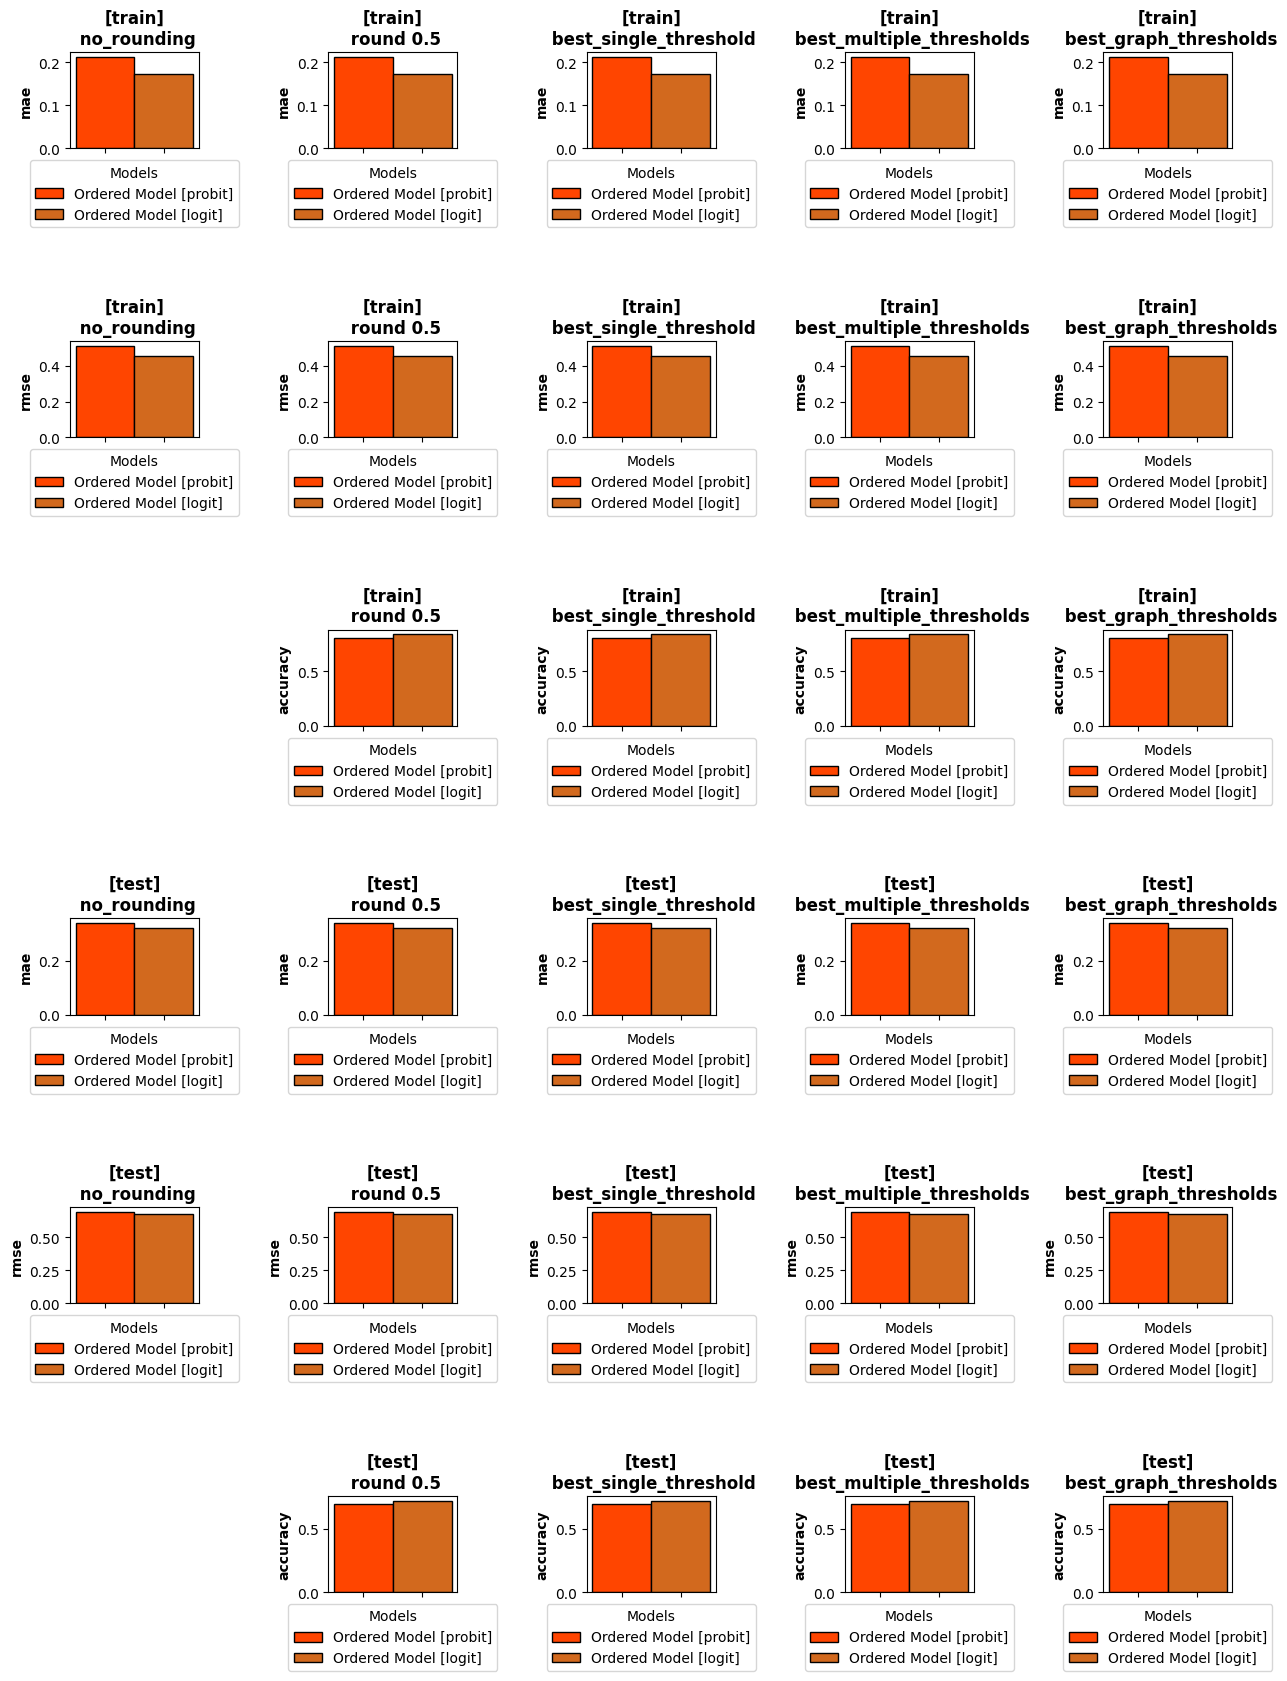

In [17]:
from training.results import plot_results


plot_results(
    {"ordered_model_probit": results_probit, "ordered_model_logit": results_logit},
    measure_types=["mae", "rmse", "accuracy"],
    figsize=(15, 20),
    sets=[
        "train",
        "test",
    ],
    rounding_types=[
        "no_rounding",
        "round 0.5",
        "best_single_threshold",
        "best_multiple_thresholds",
        "best_graph_thresholds",
    ],
    hspace=2,
    wspace=1,
)